In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
# put diad fit somewhere
#sys.path.append(r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests')
import DiadFit as pf
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel, QuadraticModel, LorentzianModel


## Put folder here

In [2]:
# Add the path with your spectra in
path=r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Example_notebooks_Spectra'
# Options, 'headless_txt', txt file with no title, 'Witec_ASCII' - witec txt with metadata, 'Renishaw_txt': txt with 2 headers, 'HORIBA_txt' - metadata+x-y- dat
filetype='headless_csv'
#True if has witec '01' in front.
prefix=False 

In [3]:
Diad_files=pf.get_diad_files(path, file_fmt='CSV')

In [4]:
Diad_files

['09-K14.CSV', 'Diad_Fitting_CSV.ipynb']

## Pick file here, e.g. each time scroll up to here and run the next cells

09-K14.CSV


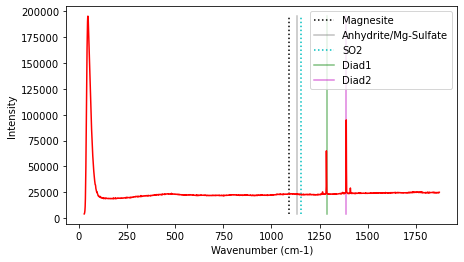

In [5]:
filename=Diad_files[0] # or put ='FG04_10_MI1_2.txt'
#filename='WITEC_ASCII_MS14_11_MI1_50X.txt'
print(filename)
pf.plot_diad(path=path, filename=filename, filetype=filetype)

### This cell determins whether you want to proceed to fit a carbonate peak

In [6]:
# If you select True, you can tweak the fit, if False, it will just run onto the next cell. 
fit_carbonate=False

# You can exclude a range here, e.g. if you have a nasty Cosmic ray
exclude_range=None#[1080, 1088]

# This selects the two background positions
lower_range=[1060, 1065]
upper_range=[1120, 1130]

# This sets the peak center, you can tweak if needed
cent=1090

# Tweak degree of poylnomial fitting the background
N_poly=1

# Select sigma level, e.g. discard points in background N* sigma outside mean
outlier_sigma=12

# N PEAKS - if you want approx peak positionYs
N_peaks=3

# Amplitude, may need to tweak
amplitude=1000


Carb_fit, xx_carb, y_carb, result0=pf.fit_carbonate_peak(path=path, 
filename=filename, filetype=filetype,
lower_range=lower_range, upper_range=upper_range, cent=cent, exclude_range=exclude_range,
N_poly=N_poly, outlier_sigma=outlier_sigma, N_peaks=N_peaks, amplitude=amplitude,
distance = 10, prominence=5, width=6  , threshold=0.1, fit_carbonate=fit_carbonate)
Carb_fit

## Plot diads to have a look, and get approx peak positions
- Choose how many peaks you want with

Using initial estimates: Diad1+HB=[1284.9 1265.5], Diad2+HB=[1388.1 1409.4]


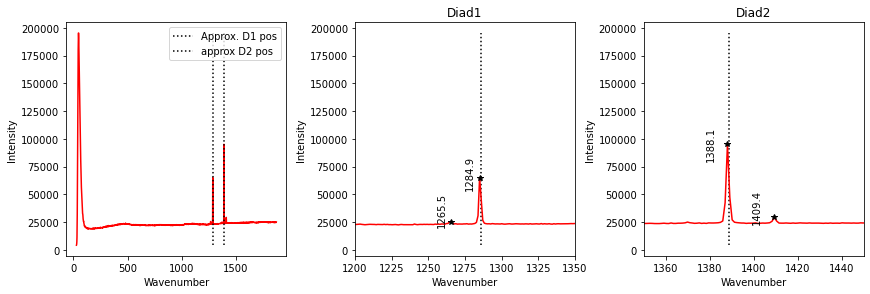

In [7]:
# If you have cosmic rays, you can remove up to 2 segments here (more if you ask penny nicely)
exclude_range1=None#[1320, 1340]#None
exclude_range2=None#[1236, 1250]
# Specify the number of peaks, e.g. 2 if have HB, 3 for Diad2 if have HB + C13, 1 if no HB
n_peaks_diad1=2
n_peaks_diad2=2 # C13 doesnt really work with gaussian

diad1_peaks, diad2_peaks=pf.identify_diad_peaks(path=path, filename=filename, filetype=filetype,
n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2,                                      
exclude_range1=exclude_range1,  exclude_range2=exclude_range2,
height = 400, threshold = 0.5, distance = 5, prominence=10, width=0.5)

In [8]:
# Uncomment this if you have no diads, it will export the carbonate peak parameters
#pf.proceed_to_fit_diads(filename, Carb_fit)

## Fit Diad 1

329.62139447573566
1264.97970027242
1285.2564193281482
C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Example_notebooks_Spectra


,Diad1_Cent,Diad1_Area,HB1_Cent,HB1_Area,Residual_Diad1
0,1285.256419,92750.255861,1264.9797,8542.197169,160.29929


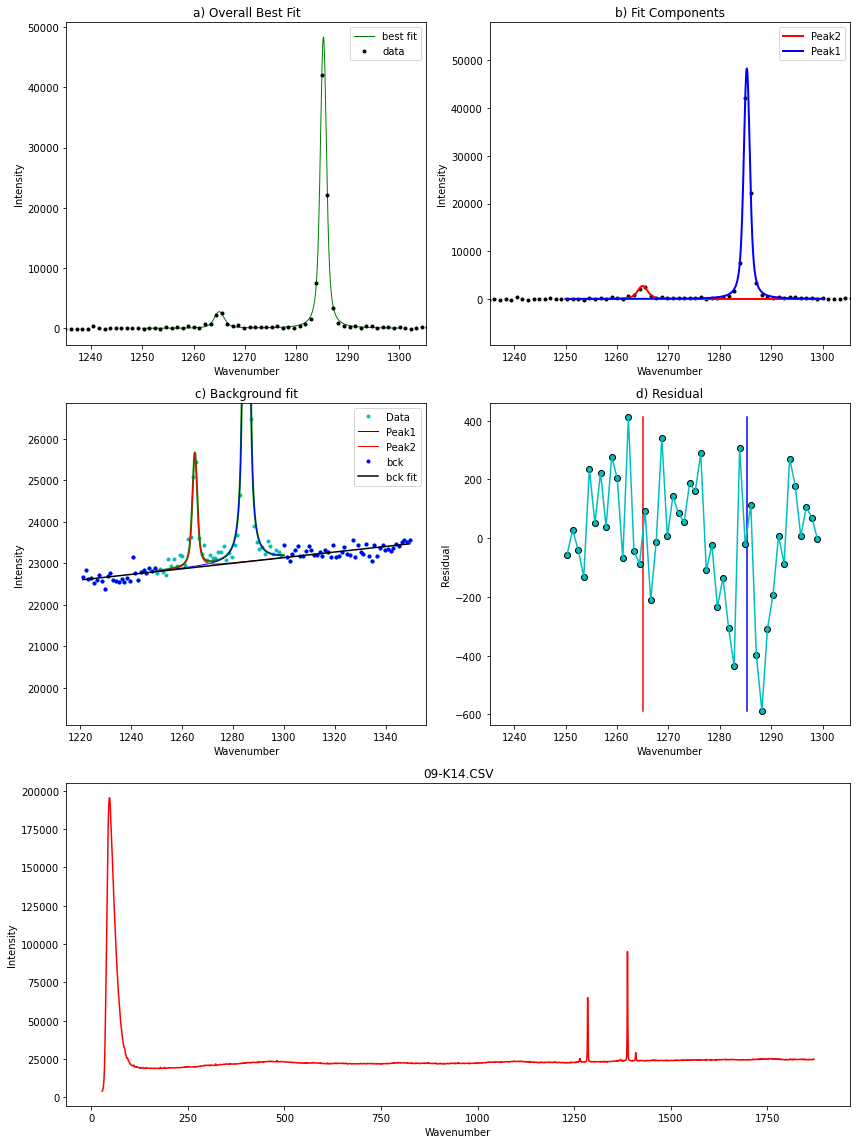

In [9]:
# If you enter a number here, it will fit a Gaussian background centered near the peak pos.. Else, if None, it wont.  Gaussian or not, either enter approximate center of Guassian, or None
peak_pos_gauss=None#(1250)
# Degree of polynomail for the background
N_poly_bck_diad1=1
# LH range to use as baseline for the diad
lower_baseline_diad1=[1220, 1250]
# RH range to use as baseline for the diad
upper_baseline_diad1=[1300, 1350]
## Change amplitude
amplitude=1000


Diad1_fit, result_diad1, best_fit_diad1, xdat_diad1=pf.fit_diad_1_w_bck(path=path, 
filename=filename, filetype=filetype,
exclude_range1=exclude_range1, exclude_range2=exclude_range2,
N_poly_bck_diad1=N_poly_bck_diad1, lower_baseline_diad1=lower_baseline_diad1,
upper_baseline_diad1=upper_baseline_diad1,
peak_pos_voigt=diad1_peaks, peak_pos_gauss=peak_pos_gauss, amplitude=amplitude)
Diad1_fit

## Fit diad 2

393.1573357543256
<class 'tuple'>
1388.146403386802
<Parameter 'sigma', value=0.4137511470773003 +/- 0.00455, bounds=[0:inf]>
fwhm gauss
{'lz2_amplitude': 11182.294673815466, 'lz2_center': 1409.4284676619297, 'lz2_sigma': 0.4459033285711471, 'lz2_gamma': 0.4459033285711471, 'lz1_amplitude': 142195.9332629943, 'lz1_center': 1388.1464465938016, 'lz1_sigma': 0.4135928825889832, 'lz1_gamma': 0.4135928825889832}
type peak pos
<class 'tuple'>
made df
C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Example_notebooks_Spectra


,Diad2_Cent,Diad2_Area,HB2_Cent,HB2_Area,Residual_Diad2
0,1388.146447,142195.933263,1409.428468,11182.294674,244.644775


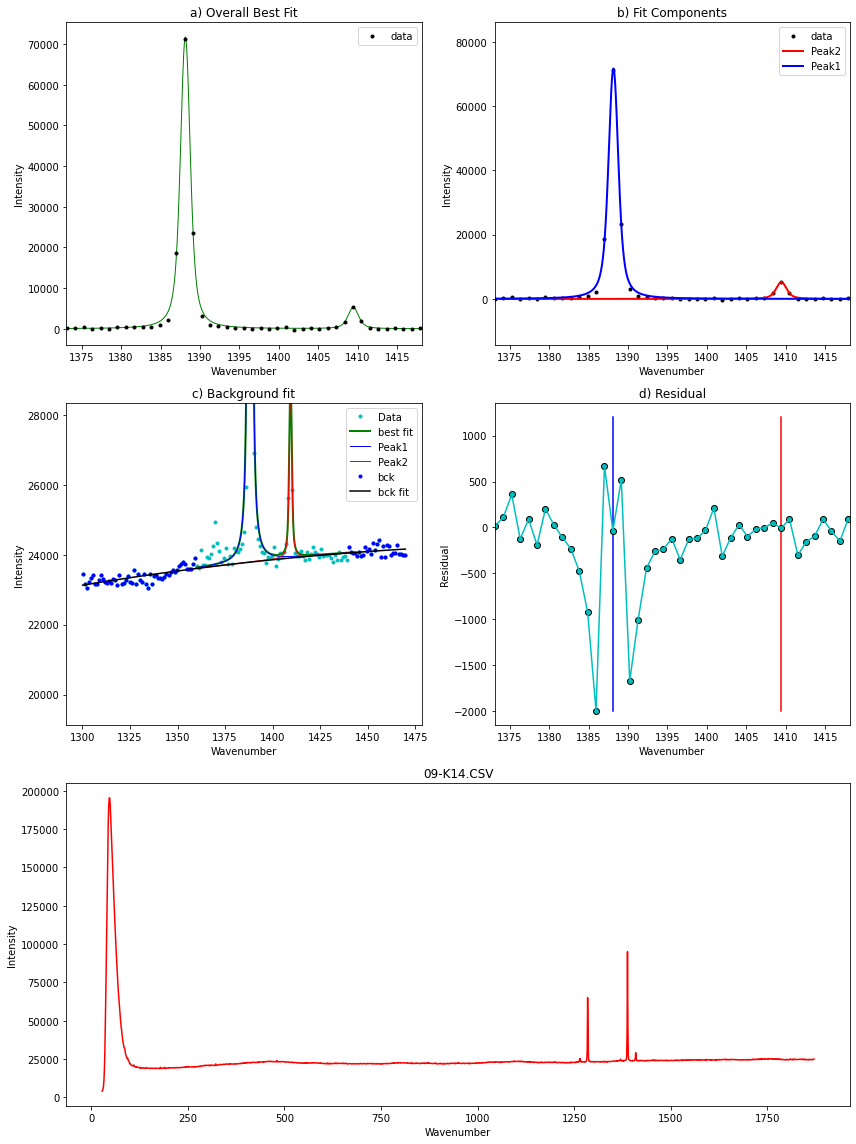

In [10]:
# Gaussian or not, either enter approximate center of Guassian, or None
peak_pos_gauss=None#(1378)
# If need to adjust shape of gaussian, enter fwhm here
gauss_sigma=100
gauss_sigma_min=10
gauss_amp=30000
# Degree of polynomail for the background
N_poly_bck_diad2=2
# LH range to use as baseline for the diad
lower_baseline_diad2=[1300, 1360]
# RH range to use as baseline for the diad
upper_baseline_diad2=[1440, 1470]
# Tweak amplitude if needed
amplitude=10000
# This then takes these inputs and feeds them into the function
Diad2_fit, result_diad2, best_fit_diad2, xdat_diad2 =pf.fit_diad_2_w_bck(path=path, filename=filename, filetype=filetype, peak_pos_voigt=diad2_peaks,
exclude_range1=exclude_range1, exclude_range2=exclude_range2, N_poly_bck_diad2=N_poly_bck_diad2, 
lower_baseline_diad2=lower_baseline_diad2, upper_baseline_diad2=upper_baseline_diad2,
peak_pos_gauss=peak_pos_gauss, gauss_sigma=gauss_sigma,gauss_fwhm_min=gauss_sigma_min,
gauss_amp=gauss_amp,                                                                         
amplitude=amplitude)
Diad2_fit

## Combine and copy to clipboard!

In [11]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, Diad1_fit=Diad1_fit, 
                        Diad2_fit=Diad2_fit, Carb_fit=Carb_fit)
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Residual_Diad1,Diad2_Cent,Diad2_Area,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,09-K14.CSV,102.890027,1285.256419,92750.255861,160.29929,1388.146447,142195.933263,244.644775,1264.9797,8542.197169,1409.428468,11182.294674,NaN,0


In [12]:
# With gaussian
Fityk_D1=1285.227
Fityk_D2= 1388.134877
split=Fityk_D2-Fityk_D1
split

102.90787699999987

In [13]:
# Without gaussian
Fityk_D1=1285.226604

Fityk_D2= 1388.136821

split=Fityk_D2-Fityk_D1
split

102.9102170000001

In [14]:
# With Gauss and c13
# Without gaussian
Fityk_D1=1285.228

Fityk_D2= 1388.135

split=Fityk_D2-Fityk_D1
split

102.90699999999993